In [259]:
!pip install mlxtend

    100% |████████████████████████████████| 1.3MB 5.4MB/s eta 0:00:01


In [2]:
import os
import pandas as pd
import numpy as np
from time import time
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model, svm, ensemble, metrics
from mlxtend.classifier import StackingClassifier
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

**Split Data into train and test set (undersampling, ensure proportion balance)**<br>
techniques for handling imbalanced dataset: https://towardsdatascience.com/handling-imbalanced-datasets-in-machine-learning-7a0e84220f28

In [3]:
df = pd.read_csv('loan_data_preprocessed2.csv')
df.shape

(233154, 24)

In [4]:
df.head()

,SEC.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,PRI.NO.OF.ACCTS,disbursed_amount,AVERAGE.ACCT.AGE,NO.OF_INQUIRIES,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,Aadhar_flag,VoterID_flag,...,State_ID,Employee_code_ID,Employment.Type_Self employed,PERFORM_CNS.SCORE.DESCRIPTION,db_clusters,loan_default,anomaly,db_clusters_PCA,hdb_clusters,hdb_clusters_PCA
0,-0.039835,-0.091711,-0.467804,-0.291335,-0.590198,-0.292450,-0.086581,-0.020784,1,0,...,-0.03102,-0.002388,0,-0.502999,0,0,0,-0.129513,1127,-0.244603
1,-0.039835,-0.070599,-0.276131,-0.555997,0.932337,-0.292450,-0.073427,-0.020784,1,0,...,-0.03102,-0.002388,1,0.536019,1,1,0,-0.129513,235,-0.244603
2,-0.039835,-0.091711,-0.467804,-0.083183,-0.590198,-0.292450,-0.086581,-0.020784,1,0,...,-0.03102,-0.002388,1,-0.502999,2,0,0,-0.225959,1071,-0.244603
3,-0.039835,-0.091711,0.107215,0.243307,-0.060621,1.122986,-0.086376,-0.020784,1,0,...,-0.03102,-0.002388,1,0.495388,3,1,0,-0.138039,40,-0.254629
4,-0.039835,-0.091711,-0.467804,-0.152567,-0.590198,1.122986,-0.086581,-0.020784,1,0,...,-0.03102,-0.002388,1,-0.502999,4,1,0,-0.132158,57,-0.247451


In [5]:
df1 = df.drop(['db_clusters','hdb_clusters'], axis=1)
df1.shape

(233154, 22)

In [6]:
df1.columns

Index(['SEC.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'PRI.NO.OF.ACCTS',
       'disbursed_amount', 'AVERAGE.ACCT.AGE', 'NO.OF_INQUIRIES',
       'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT', 'Aadhar_flag', 'VoterID_flag',
       'branch_id', 'supplier_id', 'manufacturer_id', 'Current_pincode_ID',
       'State_ID', 'Employee_code_ID', 'Employment.Type_Self employed',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'loan_default', 'anomaly',
       'db_clusters_PCA', 'hdb_clusters_PCA'],
      dtype='object')

In [7]:
df1.loan_default.value_counts()

0    182543
1     50611
Name: loan_default, dtype: int64

In [8]:
df2 = df1[df1.loan_default==1]
df2.shape

(50611, 22)

In [9]:
df3 = df1[df1.loan_default==0]
df3.shape

(182543, 22)

In [10]:
df4 =df3.sample(n=df2.shape[0], random_state=0)
df4.shape

(50611, 22)

In [11]:
df4.head()

,SEC.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,PRI.NO.OF.ACCTS,disbursed_amount,AVERAGE.ACCT.AGE,NO.OF_INQUIRIES,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,Aadhar_flag,VoterID_flag,...,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,Employment.Type_Self employed,PERFORM_CNS.SCORE.DESCRIPTION,loan_default,anomaly,db_clusters_PCA,hdb_clusters_PCA
101325,-0.039835,-0.091711,0.298888,-0.334353,0.270365,-0.29245,-0.050998,-0.020784,1,0,...,-0.223803,-0.005073,-0.03102,-0.002388,1,0.485943,0,0,-0.129513,-0.244603
20712,-0.039835,-0.091711,-0.276131,-0.503727,-0.193015,-0.29245,-0.073817,-0.020784,1,0,...,-0.223803,-0.003260,-0.03102,-0.002388,1,0.485943,0,0,-0.129513,-0.244603
167044,-0.039835,-0.091711,-0.467804,-0.329882,-0.590198,-0.29245,-0.086581,-0.020784,1,0,...,-0.223803,-0.003260,-0.03102,-0.003608,0,-0.502999,0,0,-0.129513,0.754420
121826,-0.039835,0.053697,-0.276131,0.300819,0.402759,-0.29245,-0.086581,-0.020784,1,0,...,-0.287164,-0.003260,-0.03102,-0.002388,1,0.485943,0,0,-0.129513,-0.244603
28741,-0.039835,0.564406,1.257252,-2.153063,0.468956,-0.29245,0.094713,-0.020784,1,0,...,-0.223803,-0.003260,-0.03102,-0.002388,1,0.485943,0,1,-0.129513,0.754420


In [12]:
df5 = pd.concat([df4,df2])
df5.shape

(101222, 22)

In [13]:
df5.loan_default.value_counts()

1    50611
0    50611
Name: loan_default, dtype: int64

In [14]:
X, y = df5.drop(['loan_default'], axis =1), df5['loan_default']
X.shape, y.shape

((101222, 21), (101222,))

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75, random_state = 0, stratify=y)
X_train.head()

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


,SEC.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,PRI.NO.OF.ACCTS,disbursed_amount,AVERAGE.ACCT.AGE,NO.OF_INQUIRIES,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,Aadhar_flag,VoterID_flag,...,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,Employment.Type_Self employed,PERFORM_CNS.SCORE.DESCRIPTION,anomaly,db_clusters_PCA,hdb_clusters_PCA
172471,-0.039835,-0.060758,0.873907,-0.144858,-0.259213,1.122986,-0.046017,-0.020784,1,0,...,-0.007676,-0.361994,-0.00326,-0.031020,-0.003364,0,0.485943,0,-0.153251,-0.270814
128046,-0.039835,-0.091711,-0.467804,1.415435,-0.590198,-0.292450,-0.086581,-0.020784,1,0,...,-0.004586,-0.287164,-0.00326,-0.031020,-0.002388,1,-0.502999,0,0.864019,-0.244603
129798,-0.039835,-0.028626,0.490561,1.064814,-0.126818,-0.292450,-0.086581,-0.020784,1,0,...,-0.004586,-0.223803,-0.00326,-0.045176,-0.002388,0,0.485943,0,-0.129513,-0.244603
30470,-0.039835,-0.091711,-0.467804,-2.475930,-0.590198,-0.292450,-0.086581,-0.020784,1,0,...,-0.004586,-0.223803,-0.00326,-0.031020,-0.003409,1,-0.502999,0,0.864019,0.754420
122834,-0.039835,0.047076,0.682234,-1.640006,0.866140,-0.292450,-0.086581,-0.020784,1,0,...,-0.004586,-0.223803,-0.00326,-0.031020,-0.002388,0,0.570046,0,-0.129513,-0.244603


In [16]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((75916, 21), (75916,), (25306, 21), (25306,))

In [17]:
print(y_train.value_counts(),'\n', y_test.value_counts())

1    37958
0    37958
Name: loan_default, dtype: int64 
 1    12653
0    12653
Name: loan_default, dtype: int64


In [18]:
37958/75916, 12653/25306

(0.5, 0.5)

Documentation on code implementation: https://scikit-learn.org/stable/supervised_learning.html

**Logistic Regression**

In [19]:
#create a new logistic regression model
log_reg = linear_model.LogisticRegression(fit_intercept=False, C=0.00001)
#fit the model to the training data
log_reg.fit(X_train, y_train)
#evaluate performance
log_reg.score(X_test, y_test)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5616454595748044

In [19]:
#predict
y_predict = log_reg.predict(X_test)
y_predict.shape

(25306,)

In [20]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.56      0.55      0.55     12653
           1       0.56      0.58      0.57     12653

   micro avg       0.56      0.56      0.56     25306
   macro avg       0.56      0.56      0.56     25306
weighted avg       0.56      0.56      0.56     25306



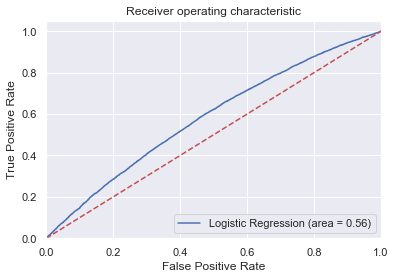

In [22]:
logit_roc_auc = metrics.roc_auc_score(y_test, y_predict)
fpr, tpr, thresholds = metrics.roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

**Support Vector Machine**<br>
concept: https://medium.com/machine-learning-101/chapter-2-svm-support-vector-machine-theory-f0812effc72<br>
code: https://medium.com/machine-learning-101/chapter-2-svm-support-vector-machine-coding-edd8f1cf8f2d

In [98]:
#subset, since SVM takes time
sample_set = 20000
X_train_subset = X_train.sample(n=sample_set)
y_train_subset = y_train[X_train_subset.index]

In [99]:
# #create a new SVM classifier model
svc = svm.SVC(kernel="linear", C=1, probability=True)
# #fit the model to the training data
svc.fit(X_train_subset, y_train_subset)
# #evaluate performance
svc.score(X_test, y_test)

0.5581285070734213

In [100]:
#predict
y_predict = svc.predict(X_test)
y_predict.shape

(25306,)

In [101]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.55      0.64      0.59     12653
           1       0.57      0.47      0.52     12653

   micro avg       0.56      0.56      0.56     25306
   macro avg       0.56      0.56      0.55     25306
weighted avg       0.56      0.56      0.55     25306



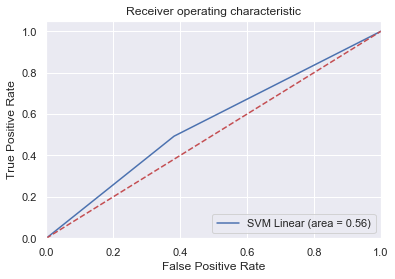

In [111]:
svm_roc_auc = metrics.roc_auc_score(y_test, y_predict)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
plt.figure()
plt.plot(fpr, tpr, label='SVM Linear (area = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

**Random Forest**<br>
concept (Decision Tree): https://medium.com/greyatom/decision-trees-a-simple-way-to-visualize-a-decision-dc506a403aeb<br>
concept (Decison Tree: which attribute to split on?): https://www.youtube.com/watch?v=nodQ2s0CUbI<br>
concept (Random Forest): https://medium.com/x8-the-ai-community/building-intuition-for-random-forests-76d36fa28c5e

In [20]:
#create a new SVM classifier model
rf = ensemble.RandomForestClassifier(n_estimators = 200)
#fit the model to the training data
rf.fit(X_train, y_train)
#evaluate performance
rf.score(X_test, y_test)

0.5724334150003951

In [122]:
#predict
y_predict = rf.predict(X_test)
y_predict.shape

(25306,)

In [123]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.57      0.58      0.58     12653
           1       0.57      0.57      0.57     12653

   micro avg       0.57      0.57      0.57     25306
   macro avg       0.57      0.57      0.57     25306
weighted avg       0.57      0.57      0.57     25306



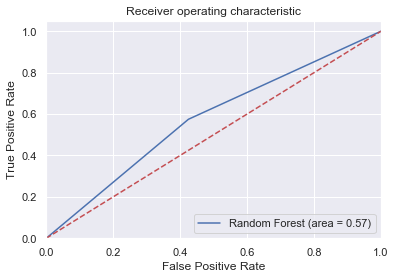

In [124]:
rf_roc_auc = metrics.roc_auc_score(y_test, y_predict)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

**K-Nearest Neighbours**

In [21]:
#create new a knn model
knn = KNeighborsClassifier(n_neighbors = 9)
#fit the model to the training data
knn.fit(X_train, y_train)
#evaluate performance
knn.score(X_test, y_test)

0.5424405279380384

In [132]:
#predict
y_predict = knn.predict(X_test)
y_predict.shape

(25306,)

In [133]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.54      0.54      0.54     12653
           1       0.54      0.54      0.54     12653

   micro avg       0.54      0.54      0.54     25306
   macro avg       0.54      0.54      0.54     25306
weighted avg       0.54      0.54      0.54     25306



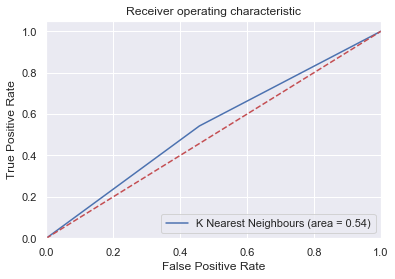

In [134]:
knn_roc_auc = metrics.roc_auc_score(y_test, y_predict)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
plt.figure()
plt.plot(fpr, tpr, label='K Nearest Neighbours (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

**Naive Bayes**<br>
concept: https://medium.com/machine-learning-101/chapter-1-supervised-learning-and-naive-bayes-classification-part-1-theory-8b9e361897d5<br>
code: https://medium.com/machine-learning-101/chapter-1-supervised-learning-and-naive-bayes-classification-part-2-coding-5966f25f1475<br>
example: https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/

In [145]:
#create new a nb model
nb = GaussianNB()
#fit the model to the training data
nb.fit(X_train, y_train)
#evaluate performance
nb.score(X_test, y_test)

0.5318501541136489

In [146]:
#predict
y_predict = nb.predict(X_test)
y_predict.shape

(25306,)

In [147]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.52      0.81      0.63     12653
           1       0.57      0.26      0.35     12653

   micro avg       0.53      0.53      0.53     25306
   macro avg       0.55      0.53      0.49     25306
weighted avg       0.55      0.53      0.49     25306



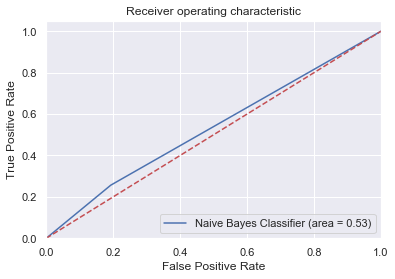

In [148]:
nb_roc_auc = metrics.roc_auc_score(y_test, y_predict)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
plt.figure()
plt.plot(fpr, tpr, label='Naive Bayes Classifier (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

**Ensemble**<br>
concept: https://blog.statsbot.co/ensemble-learning-d1dcd548e936<br>
concept2: https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205<br>
concept3: https://medium.com/@rrfd/boosting-bagging-and-stacking-ensemble-methods-with-sklearn-and-mlens-a455c0c982de<br>
code: https://towardsdatascience.com/ensemble-learning-using-scikit-learn-85c4531ff86a<br>
code2: https://github.com/vsmolyakov/experiments_with_python/blob/master/chp01/ensemble_methods.ipynb

In [22]:
#models to ensemble
estimators=[('knn', knn), ('rf', rf), ('log_reg', log_reg)]

In [23]:
#create new a ensemble model
combo1 = ensemble.VotingClassifier(estimators, voting='hard')
#fit the model to the training data
combo1.fit(X_train, y_train)
#evaluate performance
combo1.score(X_test, y_test)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5705761479491029

In [150]:
#predict
y_predict = combo1.predict(X_test)
y_predict.shape

(25306,)

In [151]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.57      0.56      0.57     12653
           1       0.57      0.57      0.57     12653

   micro avg       0.57      0.57      0.57     25306
   macro avg       0.57      0.57      0.57     25306
weighted avg       0.57      0.57      0.57     25306



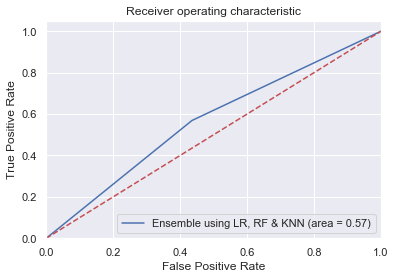

In [152]:
combo1_roc_auc = metrics.roc_auc_score(y_test, y_predict)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
plt.figure()
plt.plot(fpr, tpr, label='Ensemble using LR, RF & KNN (area = %0.2f)' % combo1_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

**Boosting**

In [24]:
#model to boost
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [25]:
#create new a boosting model
combo2 = ensemble.AdaBoostClassifier(base_estimator=clf,n_estimators=60, learning_rate=0.2699999)
#fit the model to the training data
combo2.fit(X_train, y_train)
#evaluate performance
combo2.score(X_test, y_test)

0.6034932427092389

In [255]:
#predict
y_predict = combo2.predict(X_test)
y_predict.shape

(25306,)

In [256]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.61      0.59      0.60     12653
           1       0.60      0.61      0.61     12653

   micro avg       0.60      0.60      0.60     25306
   macro avg       0.60      0.60      0.60     25306
weighted avg       0.60      0.60      0.60     25306



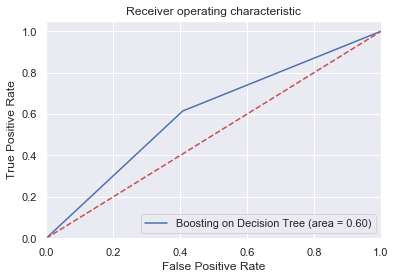

In [257]:
combo2_roc_auc = metrics.roc_auc_score(y_test, y_predict)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
plt.figure()
plt.plot(fpr, tpr, label='Boosting on Decision Tree (area = %0.2f)' % combo2_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

**Stacking**

In [26]:
#models to stack
clf1 = combo1
clf2 = combo2
#model to train on
clf_base = log_reg

In [27]:
#create new a stacking model
combo3 = StackingClassifier(classifiers=[clf1, clf2], meta_classifier=clf_base)
#fit the model to the training data
combo3.fit(X_train, y_train)
#evaluate performance
combo3.score(X_test, y_test)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5904923733501937

In [268]:
#predict
y_predict = combo3.predict(X_test)
y_predict.shape

(25306,)

In [275]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.62      0.45      0.52     12653
           1       0.57      0.73      0.64     12653

   micro avg       0.59      0.59      0.59     25306
   macro avg       0.60      0.59      0.58     25306
weighted avg       0.60      0.59      0.58     25306



In [276]:
print(metrics.confusion_matrix(y_test, y_predict))

[[5684 6969]
 [3450 9203]]


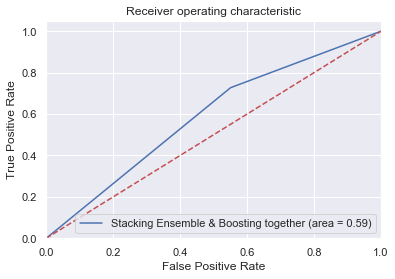

In [277]:
combo3_roc_auc = metrics.roc_auc_score(y_test, y_predict)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
plt.figure()
plt.plot(fpr, tpr, label='Stacking Ensemble & Boosting together (area = %0.2f)' % combo3_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

**Bootstrap sampling on best model**

In [28]:
X_test.shape, y_test.shape

((25306, 21), (25306,))

In [29]:
X_train.shape, y_train.shape

((75916, 21), (75916,))

In [30]:
df1.shape

(233154, 22)

In [31]:
train_index = list(set(df1.index.tolist()).difference(set(X_test.index.tolist())))
len(train_index)

207848

In [32]:
len(train_index)+X_test.shape[0]-df1.shape[0]

0

In [33]:
df_train = df1.iloc[train_index,:]
df_train.shape

(207848, 22)

In [34]:
df_train[df_train.index == X_test.index[0]]

,SEC.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,PRI.NO.OF.ACCTS,disbursed_amount,AVERAGE.ACCT.AGE,NO.OF_INQUIRIES,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,Aadhar_flag,VoterID_flag,...,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,Employment.Type_Self employed,PERFORM_CNS.SCORE.DESCRIPTION,loan_default,anomaly,db_clusters_PCA,hdb_clusters_PCA


In [35]:
df_train.loan_default.value_counts()

0    169890
1     37958
Name: loan_default, dtype: int64

In [36]:
df_train1 = df_train[df_train.loan_default==1]
df_train1.shape

(37958, 22)

In [37]:
df_train1.loan_default.value_counts()

1    37958
Name: loan_default, dtype: int64

In [38]:
df_train2 = df_train[df_train.loan_default==0].sample(n=df_train1.shape[0], replace=True)
df_train2.shape

(37958, 22)

In [39]:
df_train2.loan_default.value_counts()

0    37958
Name: loan_default, dtype: int64

In [40]:
df_train3 = pd.concat([df_train1, df_train2])
df_train3.shape

(75916, 22)

In [41]:
df_train3.loan_default.value_counts()

1    37958
0    37958
Name: loan_default, dtype: int64

In [42]:
X_train, y_train = df_train3.drop(['loan_default'], axis =1), df_train3['loan_default']
X_train.shape, y_train.shape

((75916, 21), (75916,))

In [76]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [115]:
t = time()
no_of_sampling = 100
sample_size = 500
y_predicted  = np.zeros((y_test.shape[0],), dtype=int)
print(y_predicted[:10])

for i in range(no_of_sampling):
    # bootstrap
    df_train2 = pd.concat([df_train[df_train.loan_default==0].sample(n=sample_size, replace=True), df_train[df_train.loan_default==1].sample(n=sample_size, replace=True)])
    X_train, y_train = df_train2.drop(['loan_default'], axis =1), df_train2['loan_default']    
    # fit model
    combo3.fit(X_train, y_train)    
    # predict
    y_predicted = np.sum([combo3.predict(X_test), y_predicted], axis=0)
    # time check
    print('Time to run {} sample: {} mins'.format(i+1, round((time() - t) / 60, 2)))

y_predicted = y_predicted/no_of_sampling
y_predicted[:10], y_predicted.shape

[0 0 0 0 0 0 0 0 0 0]
Time to run 1 sample: 0.05 mins
Time to run 2 sample: 0.09 mins
Time to run 3 sample: 0.14 mins
Time to run 4 sample: 0.18 mins
Time to run 5 sample: 0.22 mins
Time to run 6 sample: 0.27 mins
Time to run 7 sample: 0.31 mins
Time to run 8 sample: 0.36 mins
Time to run 9 sample: 0.4 mins
Time to run 10 sample: 0.45 mins
Time to run 11 sample: 0.49 mins
Time to run 12 sample: 0.54 mins
Time to run 13 sample: 0.58 mins
Time to run 14 sample: 0.62 mins
Time to run 15 sample: 0.67 mins
Time to run 16 sample: 0.71 mins
Time to run 17 sample: 0.76 mins
Time to run 18 sample: 0.8 mins
Time to run 19 sample: 0.85 mins
Time to run 20 sample: 0.89 mins
Time to run 21 sample: 0.94 mins
Time to run 22 sample: 0.98 mins
Time to run 23 sample: 1.03 mins
Time to run 24 sample: 1.07 mins
Time to run 25 sample: 1.12 mins
Time to run 26 sample: 1.16 mins
Time to run 27 sample: 1.2 mins
Time to run 28 sample: 1.24 mins
Time to run 29 sample: 1.29 mins
Time to run 30 sample: 1.33 mins


(array([0.88, 0.14, 0.98, 0.86, 0.35, 0.7 , 0.97, 0.95, 0.56, 0.88]), (25306,))

In [116]:
type(y_predicted), max(y_predicted),min(y_predicted)

(numpy.ndarray, 1.0, 0.04)

In [123]:
#predict
y_predict = pred1>0.5
y_predict = y_predict.astype(int)
y_predict.shape

(25306,)

In [124]:
y_predict[:10]

array([1, 0, 1, 1, 0, 1, 1, 1, 0, 1])

In [125]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.67      0.27      0.39     12653
           1       0.54      0.87      0.67     12653

   micro avg       0.57      0.57      0.57     25306
   macro avg       0.61      0.57      0.53     25306
weighted avg       0.61      0.57      0.53     25306



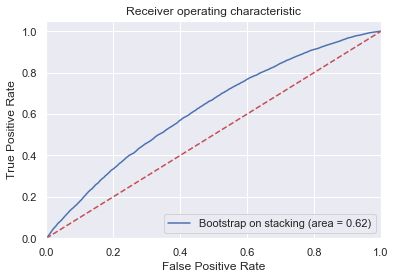

In [126]:
combo4_roc_auc = metrics.roc_auc_score(y_test, pred1)
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred1)
plt.figure()
plt.plot(fpr, tpr, label='Bootstrap on stacking (area = %0.2f)' % combo4_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

In [113]:
#archive
#pred1 = y_predicted #800 models, 400 data each

In [114]:
pred1# , pred2

array([0.80875, 0.25375, 0.93   , ..., 0.66625, 0.39125, 0.6725 ])

**using links:**<br>
sample models by kaggle competition winner: https://www.kaggle.com/c/otto-group-product-classification-challenge/discussion/14335<br>
Code to automate comparision: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html